In [45]:
import pandas as pd
import mysql.connector

In [83]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib 
import colors
from matplotlib.ticker 
import PercentFormatter
import pandas as pd

# Fixing random state for reproducibility
np.random.seed(123456789)

In [4]:
sql = "SELECT department_at_prod_id, COUNT(brand_at_prod_id) AS num_priv_prod FROM (SELECT * FROM Products WHERE brand_at_prod_id = 'CTL BR') AS A WHERE department_at_prod_id IS NOT NULL GROUP BY department_at_prod_id;"
mycursor = mydb.cursor()
mycursor.execute(sql)
myresult = mycursor.fetchall()
mycursor.close()

True

In [46]:
myresult

[('FRESH PRODUCE', 10250),
 ('DELI', 34623),
 ('GENERAL MERCHANDISE', 151670),
 ('DRY GROCERY', 397527),
 ('DAIRY', 42434),
 ('FROZEN FOODS', 63623),
 ('PACKAGED MEAT', 15851),
 ('HEALTH & BEAUTY CARE', 169236),
 ('NON-FOOD GROCERY', 152747),
 ('ALCOHOLIC BEVERAGES', 2600)]

In [49]:
priv_prod = pd.DataFrame(myresult)
priv_prod.columns = ['department_at_prod_id', 'num_priv_prod']

In [50]:
priv_prod

,department_at_prod_id,num_priv_prod
0,FRESH PRODUCE,10250
1,DELI,34623
2,GENERAL MERCHANDISE,151670
3,DRY GROCERY,397527
4,DAIRY,42434
5,FROZEN FOODS,63623
6,PACKAGED MEAT,15851
7,HEALTH & BEAUTY CARE,169236
8,NON-FOOD GROCERY,152747
9,ALCOHOLIC BEVERAGES,2600


In [ ]:
Purchases_Products = pd.merge(Purchases,Products, how='inner', on = 'prod_id')

In [34]:
priv_prod_share = pd.read_csv("~/desktop/c_3_2.csv")

In [35]:
priv_prod_share = pd.DataFrame(priv_prod_share)

In [36]:
priv_prod_share

,month,quantity_share
0,Jan,0.1941
1,Feb,0.1928
2,Mar,0.1887
3,Apr,0.1877
4,May,0.1880
5,Jun,0.1925
6,Jul,0.1965
7,Aug,0.1940
8,Sep,0.1974
9,Oct,0.1957


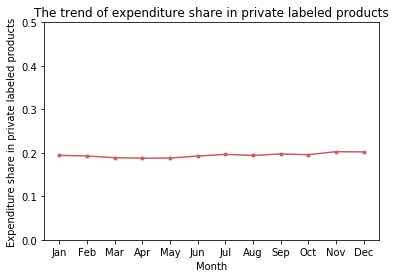

In [43]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.ylim(0, 0.5)
ax.plot(priv_prod_share["month"], priv_prod_share["quantity_share"], color = "indianred", marker = "o", markersize = 3)
ax.set_ylabel("Expenditure share in private labeled products")
ax.set_xticklabels(priv_prod_share["month"])
ax.set_xlabel("Month")
ax.set_title('The trend of expenditure share in private labeled products',fontsize=12,color='black')
plt.show()

In [47]:
sqlc1 = """SELECT department_at_prod_id, COUNT(brand_at_prod_id) AS num_priv_prod 
            FROM (SELECT * 
                      FROM Products 
                      WHERE brand_at_prod_id = 'CTL BR') AS A 
            WHERE department_at_prod_id IS NOT NULL 
         GROUP BY department_at_prod_id
         ORDER BY num_priv_prod DESC"""
mycursor = mydb.cursor()
mycursor.execute(sqlc1)
myresultc1 = mycursor.fetchall()
mycursor.close()

True

In [52]:
myresultc1 = pd.DataFrame(myresultc1)
myresultc1.columns = ["department_at_prod_id","num_priv_prod"]
myresultc1

,department_at_prod_id,num_priv_prod
0,DRY GROCERY,397527
1,HEALTH & BEAUTY CARE,169236
2,NON-FOOD GROCERY,152747
3,GENERAL MERCHANDISE,151670
4,FROZEN FOODS,63623
5,DAIRY,42434
6,DELI,34623
7,PACKAGED MEAT,15851
8,FRESH PRODUCE,10250
9,ALCOHOLIC BEVERAGES,2600


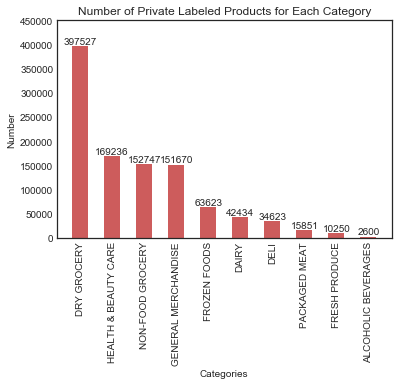

In [54]:
plt.style.use("seaborn-white")
fig, ax = plt.subplots()
ax.bar(myresultc1["department_at_prod_id"],myresultc1["num_priv_prod"], color = "indianred", width=0.5)
plt.xticks(rotation=90)
plt.ylim(0,450000)
plt.xlabel("Categories")
plt.ylabel("Number")
plt.title("Number of Private Labeled Products for Each Category")
for a,b in zip(myresultc1["department_at_prod_id"], myresultc1["num_priv_prod"]):
    ax.text(a, b, b, ha="center", va="bottom")